### Bank Customer Churn Prediction using Tree, Random Forest, Logistic Regression (GLM) and SVM
- Analyse Bank Customer Data and Classify whether the Customer will Churn
- The purpose is to Conduct Data Analysis and Feature Selection using Statistical Test as well as to Preprocess Data and Build Classifications Models for Comparison in Prediction Time and Performance

#### Import Required Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import chi2_contingency

# set plotting style
plt.style.use('fivethirtyeight')

#### Read Data
- read CSV format data into Pandas data frame

In [2]:
data_path = "../input/credit-card-customers/BankChurners.csv"

In [3]:
data = pd.read_csv(data_path, index_col='CLIENTNUM').iloc[:, :-2]
# convert column names to lower case
data.columns = list(map(lambda col: col.lower(), data.columns)) # easier to work with
data.head()

,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


#### Exploratory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 768805383 to 714337233
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   attrition_flag            10127 non-null  object 
 1   customer_age              10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   income_category           10127 non-null  object 
 7   card_category             10127 non-null  object 
 8   months_on_book            10127 non-null  int64  
 9   total_relationship_count  10127 non-null  int64  
 10  months_inactive_12_mon    10127 non-null  int64  
 11  contacts_count_12_mon     10127 non-null  int64  
 12  credit_limit              10127 non-null  float64
 13  total_revolving_bal       10127 non-null  int64  

- data contains both numeric and categorical columns
- missing values don't exist in any columns

In [5]:
data.describe()

,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


- the range of data differ which can make features with large value dominate features with small values

- select attrited customer records for further exploration

In [6]:
attrited = data.query('attrition_flag == "Attrited Customer"')

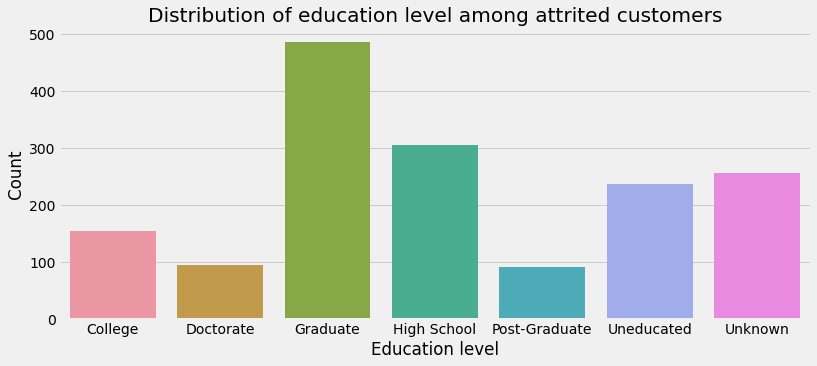

In [7]:
group = attrited.groupby(['education_level'], as_index=False).size()

fig, ax = plt.subplots(figsize=(12,5))

sns.barplot(x='education_level', y='size', data=group)

ax.set_ylabel('Count')
ax.set_xlabel('Education level')
ax.set_title('Distribution of education level among attrited customers')

plt.show()

- most common education level of attrited customers is graduate level education
- minority of attrited customers have post-graduate or higher degree.

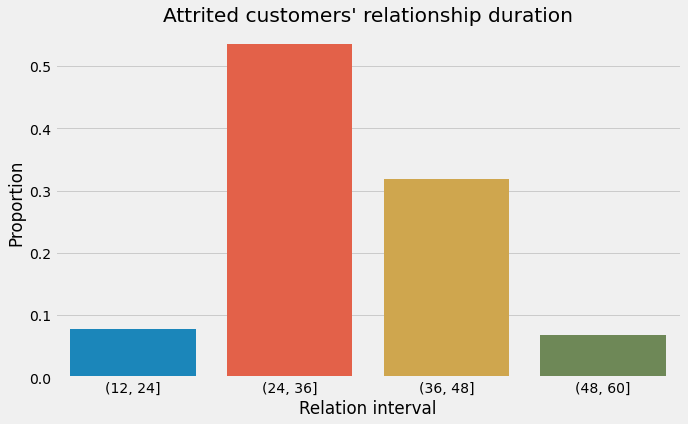

In [8]:
fig, ax = plt.subplots(figsize=(10,6))
mob_data = pd.cut(attrited['months_on_book'], bins=np.arange(12, 72, 12)).astype(str)
mob_counts = mob_data.value_counts(normalize=True).sort_index()
sns.barplot(x=mob_counts.index, y=mob_counts.values)
ax.set_ylabel('Proportion')
ax.set_xlabel('Relation interval')
ax.set_title('Attrited customers\' relationship duration')
plt.show()

- more than a half of attrited clients have maintained relation with bank from 2 to 3 years
- nearly 40 % of customers have churned after 3 years or longer relation with bank

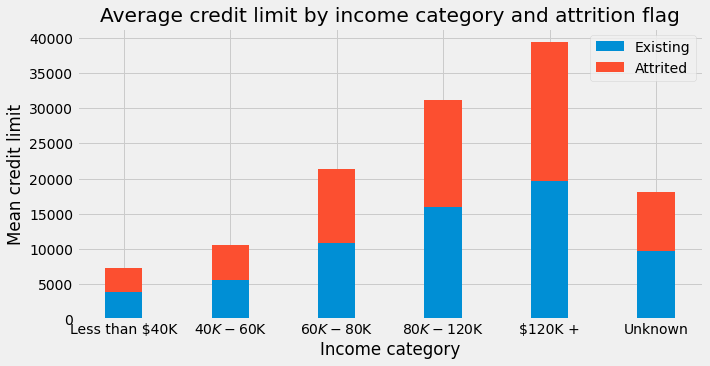

In [9]:
group = data.groupby(['income_category', 'attrition_flag'], as_index=False)['credit_limit'].mean()

labels = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown']

key_dict = {v:k for k,v in enumerate(labels)}
sort_key_func = lambda x: x.map(key_dict)

existing = group[group['attrition_flag'] == 'Existing Customer'].sort_values('income_category', key=sort_key_func)['credit_limit']
attri = group[group['attrition_flag'] == 'Attrited Customer'].sort_values('income_category', key=sort_key_func)['credit_limit']

width = 0.35  

fig, ax = plt.subplots(figsize=(10,5))

ax.bar(labels, existing, width, label='Existing')
ax.bar(labels, attri, width, bottom=existing,
       label='Attrited')

ax.set_ylabel('Mean credit limit')
ax.set_xlabel('Income category')
ax.set_title('Average credit limit by income category and attrition flag')
ax.legend()

plt.show()

- on average, existing customers in almost all income categories have higer credit limit than attrited customers
- for 120K+ dollars income category, attrited customers have slightly higer average credit limit

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


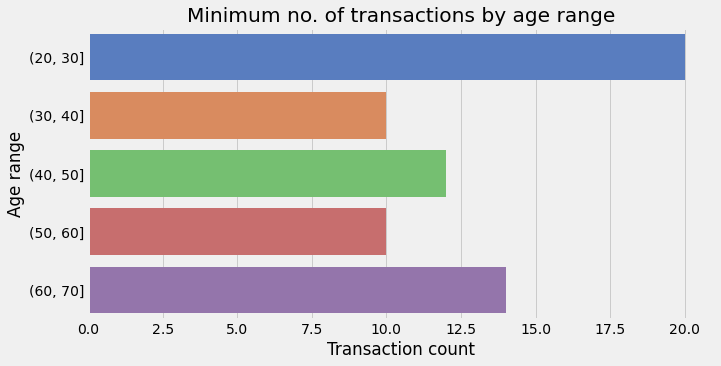

In [10]:
age_data = attrited[['customer_age', 'total_trans_ct']]
age_data['age_range'] = pd.cut(age_data['customer_age'], bins=np.arange(10, 110, 10)).astype(str)
group = age_data.groupby('age_range', as_index=False)['total_trans_ct'].min()
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(y='age_range', x='total_trans_ct', data=group, orient='h', palette='muted')
ax.set_ylabel('Age range')
ax.set_xlabel('Transaction count')
ax.set_title('Minimum no. of transactions by age range')
plt.show()

- according to data, in the past year among the attrited customers
    - a young adult customer has done transactions with the bank not less than 20 times
    - elderly customers have second highest minimum no. of transactions done with the bank

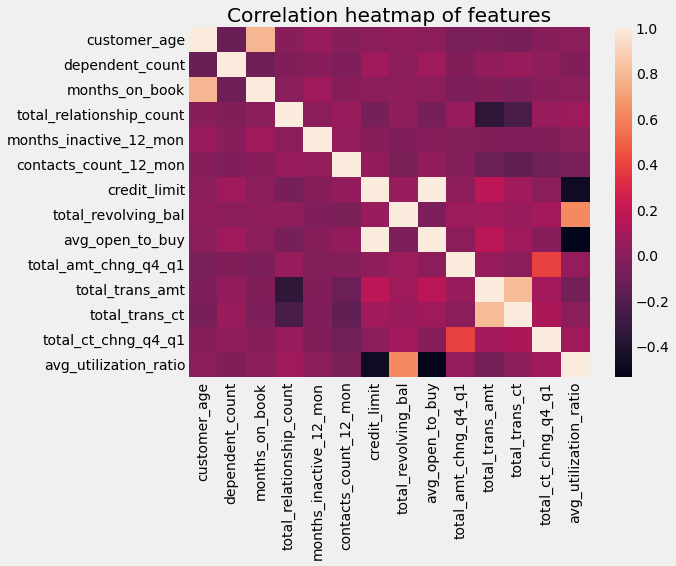

In [11]:
corr = data.corr()
plt.figure(figsize=(8,6))
plt.title('Correlation heatmap of features')
sns.heatmap(corr)
plt.show()

- some pair of features are highly to moderately correlated
- some of highly correlated features could be dropped as no additional information is added by having all of them

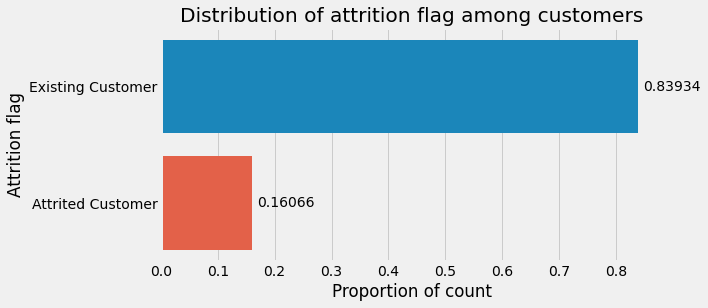

In [12]:
flag_cnt = data['attrition_flag'].value_counts(normalize=True)
plt.figure(figsize=(8,4))
ax = sns.barplot(y=flag_cnt.index, x=flag_cnt, orient='h')
ax.bar_label(ax.containers[0], padding=5)
plt.title('Distribution of attrition flag among customers')
plt.ylabel('Attrition flag')
plt.xlabel('Proportion of count')
plt.show()

- the target (attrition flag) is highly imbalanced
- in order not to let the class imbalance make model bias towards majority class
    - we might need to gather more data or 
    - use balanced class weights

#### Feature Selection and Data Spliting

- drop highly correlated features

In [13]:
data.drop(columns=['avg_open_to_buy'], inplace=True)

- split data into train and test set for evaluation

In [14]:
# split data to get test set for evaluation, stratify to not make some target class disappear from train set
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:], data.iloc[:,0], random_state=42, stratify= data.iloc[:,0])

- get column names by data type (helpful later in preprocessing)

In [15]:
cat_cols = X_train.select_dtypes(include=['object']).columns
num_cols = X_train.select_dtypes(exclude=['object']).columns

- categorical feature selection using chi-square test

In [16]:
selected_cat = []

for col in cat_cols:
    stat, pval, df, _ = chi2_contingency(pd.crosstab(X_train[col], y_train))
    print('p-value for feature {}: {}'.format(col, pval))
    if pval < 0.05:
        selected_cat.append(col)
print()
print('selected categoricals features:', ', '.join(selected_cat))

p-value for feature gender: 0.0003735273108028878
p-value for feature education_level: 0.09725475727733811
p-value for feature marital_status: 0.2714515296905626
p-value for feature income_category: 0.04785873115161535
p-value for feature card_category: 0.7325961279715022

selected categoricals features: gender, income_category


- chi-square tests are conducted to find if target and features are independent
- we can reject the null hypothesis of independence for gender and income category at significance level of 0.05
- the test suggested that attrition flag is likely to have relationship with gender and income category

#### Preprocessing
 - encode categorical input variables
 - standardize or scale numerical variable
 - label encode target

In [17]:
one_hot = OneHotEncoder(handle_unknown='ignore', sparse=False, dtype=np.int16)
train_cat = pd.DataFrame(one_hot.fit_transform(X_train[selected_cat]), index=X_train.index)
test_cat = pd.DataFrame(one_hot.transform(X_test[selected_cat]), index=X_test.index)

scaler = StandardScaler()
std_train = pd.DataFrame(scaler.fit_transform(X_train[num_cols]), columns=num_cols, index=X_train.index)
std_test = pd.DataFrame(scaler.transform(X_test[num_cols]), columns=num_cols, index=X_test.index)

minmax = MinMaxScaler()
mm_train = pd.DataFrame(minmax.fit_transform(X_train[num_cols]), columns=num_cols, index=X_train.index)
mm_test = pd.DataFrame(minmax.transform(X_test[num_cols]), columns=num_cols, index=X_test.index)

train_X = pd.concat([mm_train, train_cat], axis=1)
train_X .columns = columns=list(num_cols) + list(one_hot.get_feature_names())

test_X = pd.concat([mm_test, test_cat], axis=1)
test_X .columns = columns=list(num_cols) + list(one_hot.get_feature_names())

label_map = {"Existing Customer": 0, "Attrited Customer": 1} # for label encoding
mapper = lambda x: label_map[x]

train_y = y_train.apply(mapper)
test_y = y_test.apply(mapper)

#### Model Building, Tuning and Evaluation

In [18]:
def plot_confmat(y_true, y_pred, algo):
    classes = list(label_map.keys())
    conf_mat = pd.DataFrame(confusion_matrix(y_true, y_pred, normalize='true'), index=classes, columns=classes)
    plt.figure(figsize=(6,4))
    sns.heatmap(conf_mat, annot=True, fmt='.3f') # plot confusion matrix
    plt.title('confusion matrix for {} model'.format(algo), fontdict={'size': 16})
    plt.ylabel('true class')
    plt.xlabel('predicted class')
    plt.show()

In [19]:
def plot_feature_importance(feature_importances, algo, columns=train_X.columns):
    plt.figure(figsize=(8,6))
    imp_df = pd.DataFrame({
        'column': columns,
        'importance': feature_importances
    }) \
    .sort_values('importance', ascending=False) \
    .query('abs(importance) > 0')
    sns.barplot(y='column', x='importance', data= imp_df, orient='h', palette='muted')
    plt.title('feature importance for {} model'.format(algo), fontdict={'size': 16})
    plt.show()

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      2125
           1       0.59      0.88      0.71       407

    accuracy                           0.88      2532
   macro avg       0.78      0.88      0.82      2532
weighted avg       0.91      0.88      0.89      2532
 



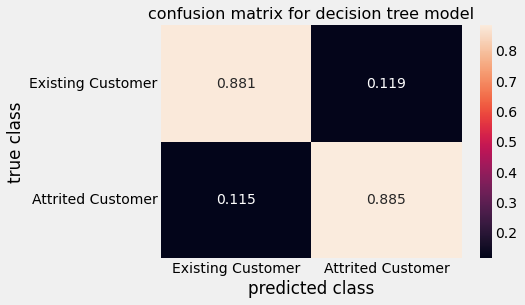

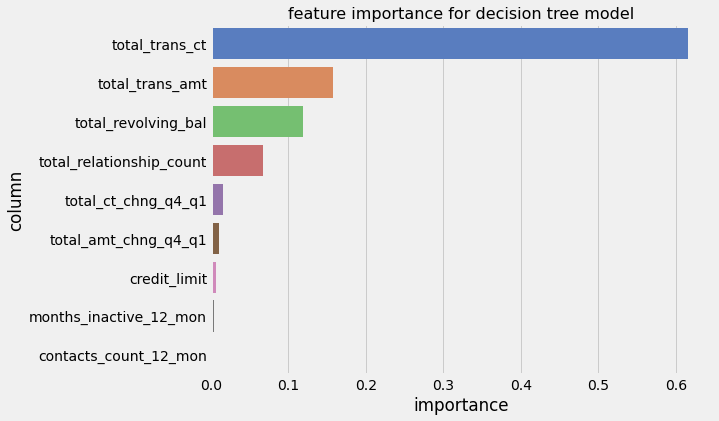

In [20]:
dt = DecisionTreeClassifier(random_state=42, max_depth=4, class_weight='balanced')
dt.fit(train_X, train_y)

pred_dt = dt.predict(test_X)
print(classification_report(test_y, pred_dt),'\n')

plot_confmat(test_y, pred_dt, 'decision tree')

print('\n')
plot_feature_importance(dt.feature_importances_, 'decision tree')

- from the precision metric, the decision tree model tend to predict existing customers as churned customers
- categorical features have no contribution in tuned tree's prediction

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      2125
           1       0.56      0.85      0.67       407

    accuracy                           0.87      2532
   macro avg       0.76      0.86      0.80      2532
weighted avg       0.90      0.87      0.88      2532
 



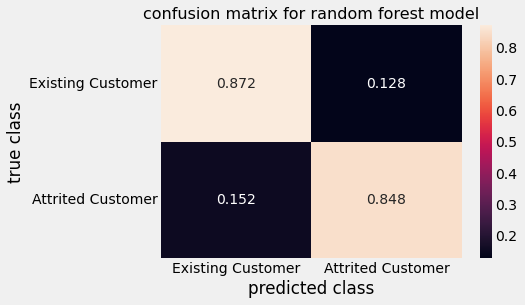

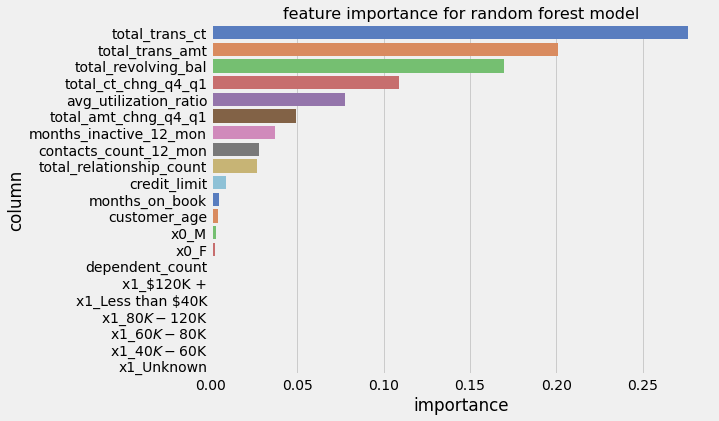

In [21]:
rf = RandomForestClassifier(random_state=42, max_depth=4, n_estimators=80, class_weight='balanced')
rf.fit(train_X, train_y)

pred_rf = rf.predict(test_X)
print(classification_report(test_y, pred_rf),'\n')

plot_confmat(test_y, pred_rf, 'random forest')

print('\n')
plot_feature_importance(rf.feature_importances_, 'random forest')

- random forest model has used more features for prediction than a single decision tree model
- features that have high contribution in seperating churned customers from existing customers are transaction related data
- random forest model is performing a bit worse than decision tree model

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      2125
           1       0.51      0.83      0.63       407

    accuracy                           0.84      2532
   macro avg       0.73      0.84      0.76      2532
weighted avg       0.89      0.84      0.86      2532
 



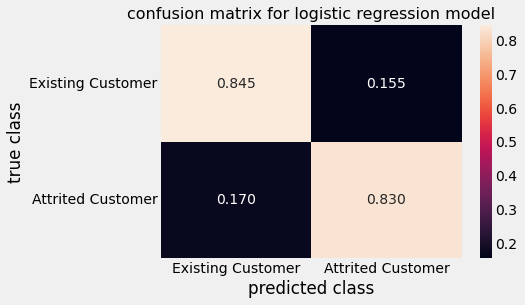

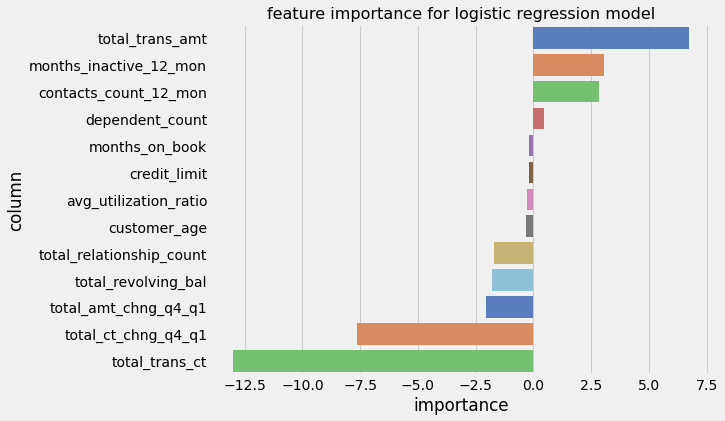

In [22]:
lr = LogisticRegression(random_state=42, max_iter=1e3, class_weight='balanced')
lr.fit(mm_train, train_y)

pred_lr = lr.predict(mm_test)
print(classification_report(test_y, pred_lr),'\n')

plot_confmat(test_y, pred_lr, 'logistic regression')

print('\n')
plot_feature_importance(lr.coef_[0], 'logistic regression', num_cols)

- use statmodels library to get more information about effect of feature on target and whether we can rely on those effects

In [23]:
# intercept not added to data by default
lr_sm = sm.GLM(train_y, sm.add_constant(mm_train, prepend=False), family=sm.families.Binomial())
lr_sm_results = lr_sm.fit()

print(lr_sm_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:         attrition_flag   No. Observations:                 7595
Model:                            GLM   Df Residuals:                     7581
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1795.5
Date:                Mon, 17 Jan 2022   Deviance:                       3591.0
Time:                        16:40:52   Pearson chi2:                 6.93e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
customer_age            

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


- for the logistic regression model at significance level of 0.05, it is hard to conclude that how the features below will have effect on log odds of customer churning
    - customer_age
    - months_on_book
    - credit_limit
    - total_amt_chng_q4_q1
    - avg_utilization_ratio
- log odds of customer churning = ln(prob. churning / prob. not churning)
- higher value of feature listed below is likely to reduce the log odds of customer churning
    - total_relationship_count
    - total_revolving_bal
    - total_trans_ct
    - total_ct_chng_q4_q1

In [24]:
# deviance is similar to SS(residual) in linear regression, the higher the worse
lr_sm_results.null_deviance - lr_sm_results.deviance

3103.4387744151945

- using the predictors, model deviance has reduced by 3103.44
- model with features seems to be better than intercept only model 

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      2125
           1       0.66      0.90      0.76       407

    accuracy                           0.91      2532
   macro avg       0.82      0.91      0.85      2532
weighted avg       0.93      0.91      0.92      2532
 



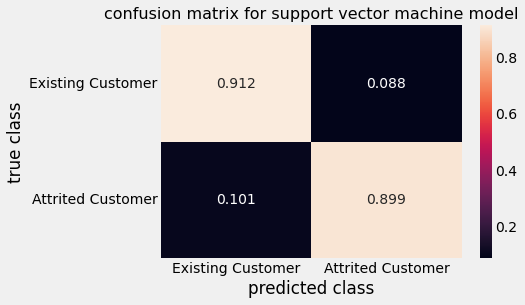

In [25]:
svm = SVC(kernel='rbf', class_weight='balanced')
svm.fit(std_train, train_y)

pred_svm = svm.predict(std_test)
print(classification_report(test_y, pred_svm),'\n')

plot_confmat(test_y, pred_svm, 'support vector machine')

- using different preprocessing method for numerical features did not affect model performance much

#### Prediction Time Comparison

In [26]:
%time dt.predict(test_X)
%time rf.predict(test_X)
%time lr.predict(mm_test)
%time svm.predict(std_test)

CPU times: user 2.64 ms, sys: 0 ns, total: 2.64 ms
Wall time: 2.67 ms
CPU times: user 24.1 ms, sys: 0 ns, total: 24.1 ms
Wall time: 24.3 ms
CPU times: user 6.43 ms, sys: 14.9 ms, total: 21.3 ms
Wall time: 9.43 ms
CPU times: user 335 ms, sys: 211 ms, total: 546 ms
Wall time: 212 ms


array([0, 1, 0, ..., 0, 0, 0])

- decision tree model seems to be the fastest to predict labels for test set
- svm is the slowest for test set prediction but it is the best performing
- if fastness and interpretability are the priorities, we could choose decision tree otherwise svm

#### Predictions

In [27]:
inverse_map = {0: 'Existing Customer', 1: 'Attrited Customer'}
inverse_mapper = lambda x: inverse_map[x]
final = pd.Series(pred_svm, index=X_test.index).apply(inverse_mapper)
final.tail(30)

CLIENTNUM
713693958    Attrited Customer
721384308    Existing Customer
718441308    Existing Customer
715304958    Attrited Customer
708295533    Existing Customer
708113208    Existing Customer
814852533    Existing Customer
716260833    Attrited Customer
710581758    Existing Customer
820047858    Attrited Customer
709178733    Attrited Customer
717277833    Existing Customer
712673283    Existing Customer
715502808    Existing Customer
712507758    Existing Customer
809855808    Existing Customer
709235058    Existing Customer
708496833    Attrited Customer
711843708    Attrited Customer
710952933    Existing Customer
715074258    Attrited Customer
708197358    Attrited Customer
708099183    Existing Customer
820925433    Existing Customer
778728783    Existing Customer
814593858    Existing Customer
716403633    Existing Customer
779425608    Existing Customer
712839633    Existing Customer
713363583    Existing Customer
dtype: object